In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Diabetes Prediction on Pima Indians Diabetes Database using Naive Bayes

Data Set Link - https://www.kaggle.com/uciml/pima-indians-diabetes-database The Pima Indian Diabetes Database is from National Institute of Diabetes and Digestive and Kidney Diseases. It consists of nine variables, out of which 'outcome' is the target variable. The objective of this dataset is to aid in predicting if a person is likely to have Diabetes or not.

Data Desription

Predictor Variables

Preganancies - Number of times the patient got pregnant

Glucose - Plasma glucose concentration

Blood Preassure - Diastolic Blood Preassure (mmHg)

Skin Thickness - Triceps skin fold thickness (mm)

Insulin - 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [99]:
dataset = pd.read_csv("Diabetes 6.40.48 PM.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
dataset.shape

(768, 9)

In [101]:
#Checking Null Values 
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [104]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing Value Detection and Treatment


The following values in a data set are considered to be missing values -

Blank Values

NaN

null

Some countinuous columns might have 0's to indicate missing data.

In [113]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above description of the data, we can see that columns - Pregnancies, Glucose, Blood Preassure, Skin Thickness, Insulin and BMI have minimum values of 0. It makes sense to have 0 prgnancies, but the it does not make sense for other mentioned variables to have a minimum value of 0. So we can conclude that Glucose, Blood Preassure, Skin Thickness, Insulin and BMI have missing data. The 0's in these columns should be replaced with the median, since the median is least affected by outliers.

In [114]:
dataset["Gluscose"] = dataset["Glucose"].replace(0,np.nan)
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0,np.nan)
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0,np.nan)
dataset["Insulin"] = dataset["Insulin"].replace(0,np.nan)
dataset["BMI"] = dataset["BMI"].replace(0,np.nan)

In [115]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Age Group                     0
Gluscose                      5
dtype: int64

Now we fill them with median as median is not effected by outlier

As inferred columns glucose, Blood Preassure, Skin Thickness, Insulin and BMI have missing data. Glucose, Blood Preassure and BMI have less number of missing data but skin thickness and Insulin have a very high amount of missing data. Removing these missing data from the data set will result in information loss and it is not advisable to remove thse records since we have only 768 records. Hence we will impute these missing values with the median of their respective columns, since median is the least affected by outliers.

In [116]:
dataset.median()

<ipython-input-116-e22d0dc743ec>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.median()


Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
Gluscose                    117.0000
dtype: float64

In [118]:
dataset.fillna(dataset.median(),inplace = True)

<ipython-input-118-44f3b4df13bd>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.median(),inplace = True)


In [119]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age Group                   0
Gluscose                    0
dtype: int64

# Outlier Detection and treatment

Outlier Detection

Boxplots are a great way of detecting outliers. Once the outliers have been detected, they can be imputed with the 5th and 95th percentiles

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

<AxesSubplot:xlabel='Gluscose'>

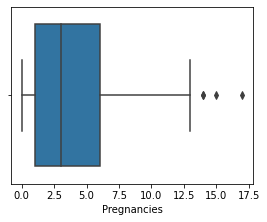

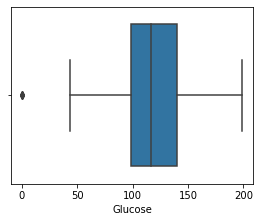

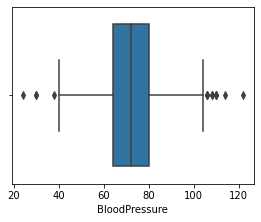

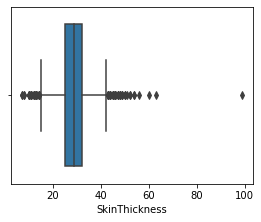

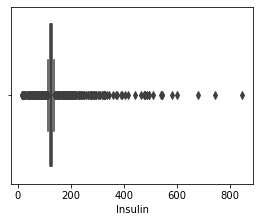

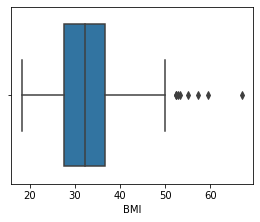

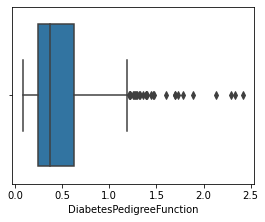

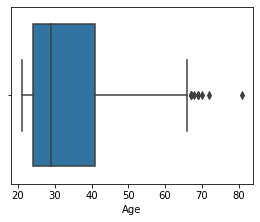

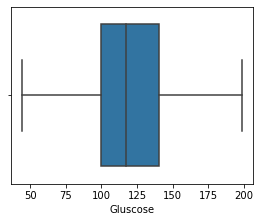

In [120]:
#outlier Detection Using boxplot
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset['Pregnancies'])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["Glucose"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["BloodPressure"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["SkinThickness"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["Insulin"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["BMI"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["DiabetesPedigreeFunction"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["Age"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["Gluscose"])




# HANDLING OUTLIER

In [126]:
dataset['Pregnancies']=dataset['Pregnancies'].clip(lower=dataset['Pregnancies'].quantile(0.05), upper=dataset['Pregnancies'].quantile(0.95))
dataset["BloodPressure"] = dataset["BloodPressure"].clip(lower = dataset["BloodPressure"].quantile(0.05),upper = dataset["BloodPressure"].quantile(0.95))
dataset['SkinThickness']=dataset['SkinThickness'].clip(lower=dataset['SkinThickness'].quantile(0.05), upper=dataset['SkinThickness'].quantile(0.95))
dataset['Insulin']=dataset['Insulin'].clip(lower=dataset['Insulin'].quantile(0.21), upper=dataset['Insulin'].quantile(0.80))
dataset['BMI']=dataset['BMI'].clip(lower=dataset['BMI'].quantile(0.05), upper=dataset['BMI'].quantile(0.95))
dataset['DiabetesPedigreeFunction']=dataset['DiabetesPedigreeFunction'].clip(lower=dataset['DiabetesPedigreeFunction'].quantile(0.05), upper=dataset['DiabetesPedigreeFunction'].quantile(0.95))
dataset['Age']=dataset['Age'].clip(lower=dataset['Age'].quantile(0.05), upper=dataset['Age'].quantile(0.95))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

<AxesSubplot:xlabel='Gluscose'>

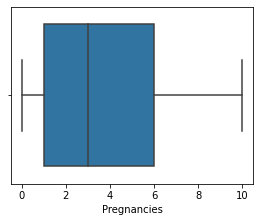

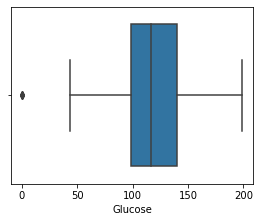

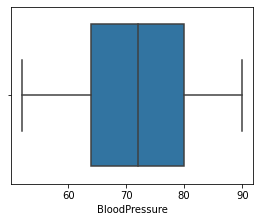

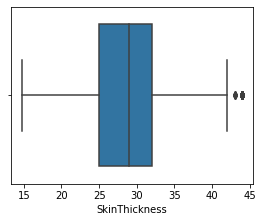

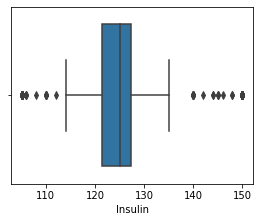

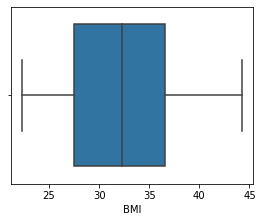

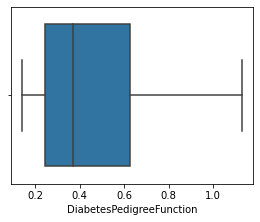

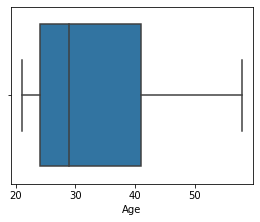

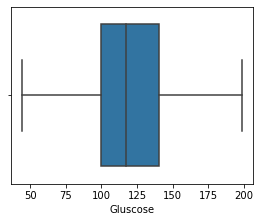

In [127]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset['Pregnancies'])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["Glucose"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["BloodPressure"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["SkinThickness"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["Insulin"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["BMI"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["DiabetesPedigreeFunction"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["Age"])

plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(dataset["Gluscose"])




The scatter plot reveals a positive correlation between 'Glucose' and 'Insulin' levels, indicating that as 'Glucose' levels increase, 'Insulin' levels tend to rise as well. Diabetic individuals, represented by colored points, generally exhibit higher levels of both 'Glucose' and 'Insulin' compared to non-diabetic individuals. Variability is evident among diabetic cases, with some individuals having notably higher 'Insulin' levels for a given 'Glucose' level. Outliers suggest unique scenarios, such as cases with elevated 'Glucose' but relatively lower 'Insulin', potentially signifying varying degrees of insulin resistance or specific medical conditions. In summary, the plot underscores the connection between 'Glucose' and 'Insulin' in diabetic and non-diabetic contexts, offering insights into potential trends and variations in these measurements.

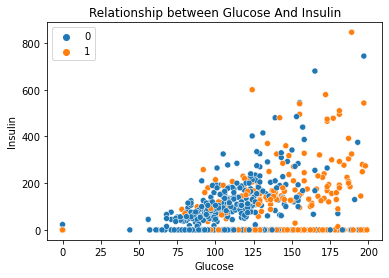

In [106]:
sns.scatterplot(data = dataset, x = "Glucose",y = "Insulin",hue = "Outcome")
plt.title("Relationship between Glucose And Insulin")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

In [107]:
columns = dataset.columns
corr_matrix = dataset[columns].corr()

As you can see many of the columns are positively correlated with outcome specially pregnancies,Glucose_Level,insulin,BMI,AGE

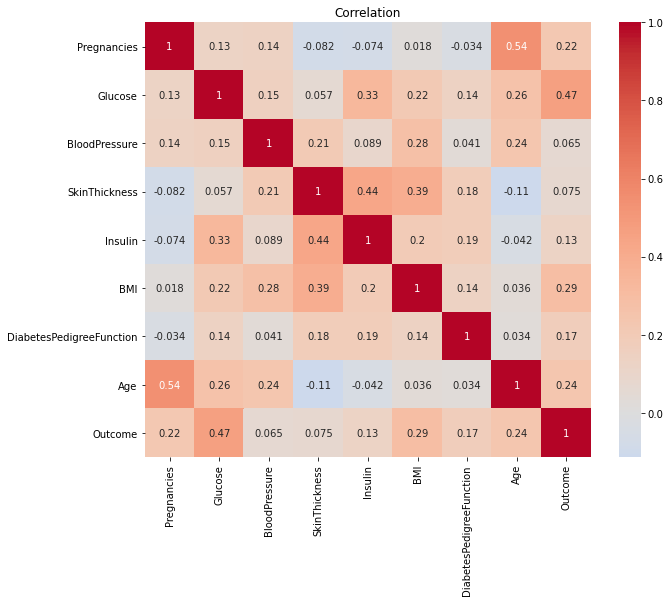

In [108]:
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix,annot = True,cmap = "coolwarm",center = 0)
plt.title("Correlation")
plt.show()

In [109]:
age_bins = [20,30,40,50,60,70,80,90]
dataset["Age Group"] = pd.cut(dataset["Age"],bins = age_bins)

In [110]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age Group
0,6,148,72,35,0,33.6,0.627,50,1,"(40, 50]"
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 40]"
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 40]"
3,1,89,66,23,94,28.1,0.167,21,0,"(20, 30]"
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 40]"


Now we analyze the diabeties by age group to see what age group mostly contains diabeties

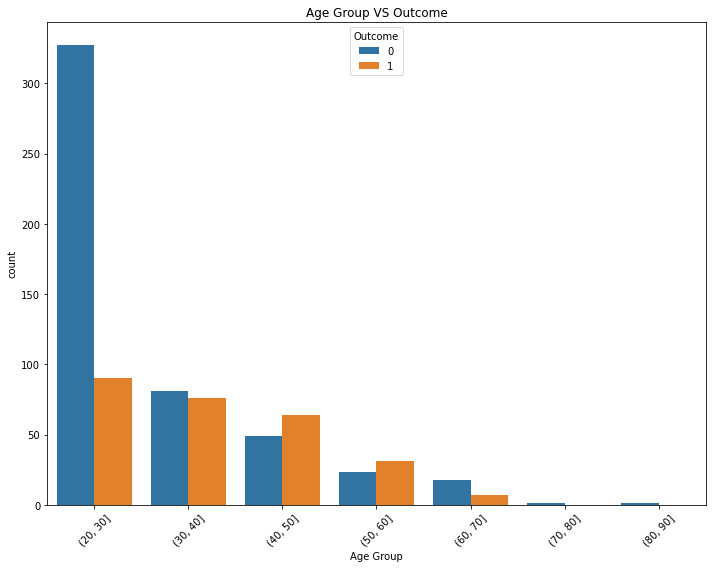

In [111]:
plt.figure(figsize = (10,8))
sns.countplot(data = dataset, x = "Age Group",hue = "Outcome")
plt.title("Age Group VS Outcome")
plt.xlabel("Age Group")
plt.ylabel("count")
plt.legend(title = "Outcome")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# BMI VS AGE

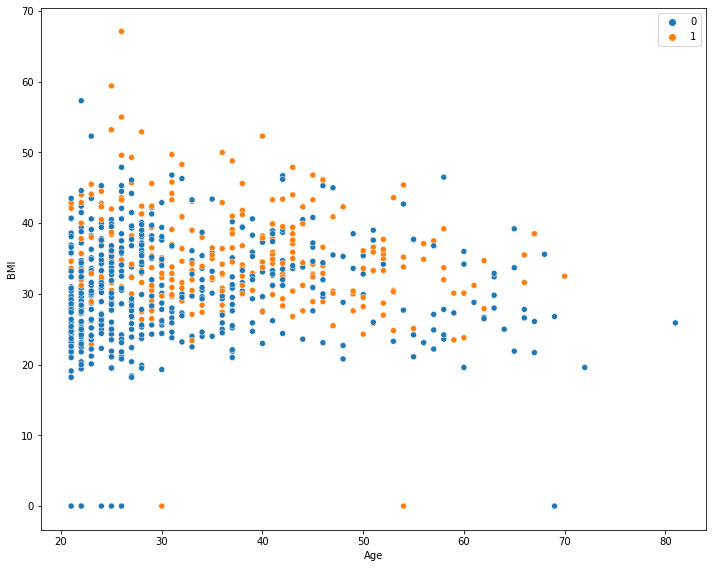

In [112]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = dataset,x = "Age",y = "BMI",hue = "Outcome")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend()
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

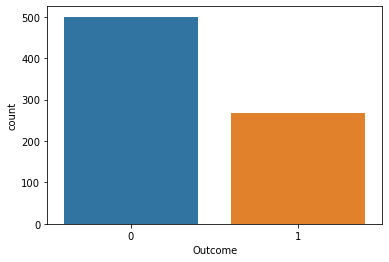

In [128]:
sns.countplot(dataset["Outcome"])

From the above plot we can infer that majority of the data consists of Non Diabetic Patients. Lets try to understand the percentage distribution of Diabetic Vs Non Diabetic in the data set.

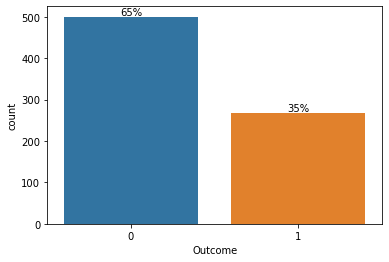

In [131]:
total=float(len(dataset))
ax = sns.countplot(x="Outcome", data=dataset) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center")

About 65% of the data contains records belonging to Non Diabetic Patients. The data set has a class imbalance and might have to be treated in future, during the model building stages.

Lets now plot a corr-plot (correlation plot). This plot will help us understand if there is multi colinearity in the data set.

<ipython-input-133-3463ad1ff73d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr("pearson")
<ipython-input-133-3463ad1ff73d>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

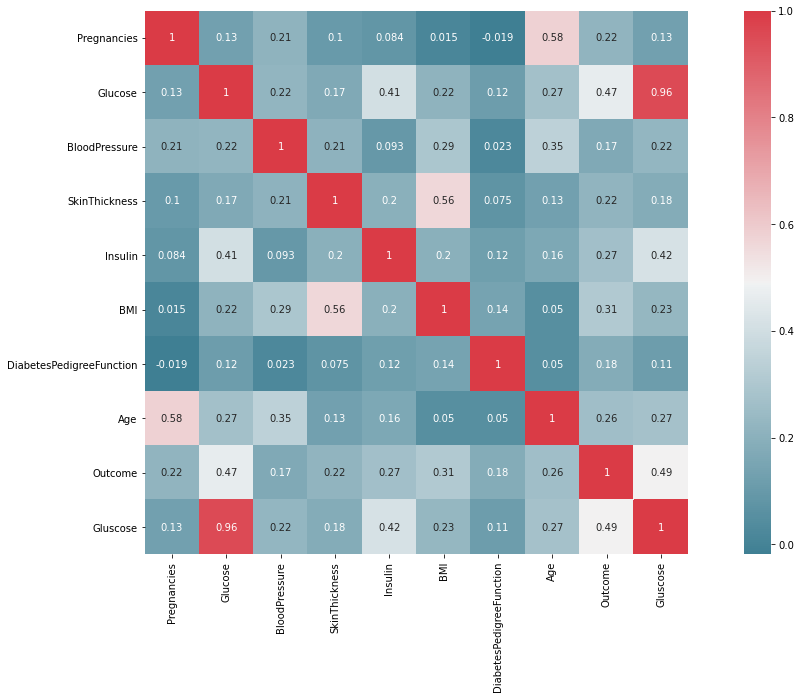

In [133]:
f, ax = plt.subplots(figsize=(20, 10))
corr = dataset.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

From the above corr-plot, it can be inffered that there is no high multi-colinearity in the data set.



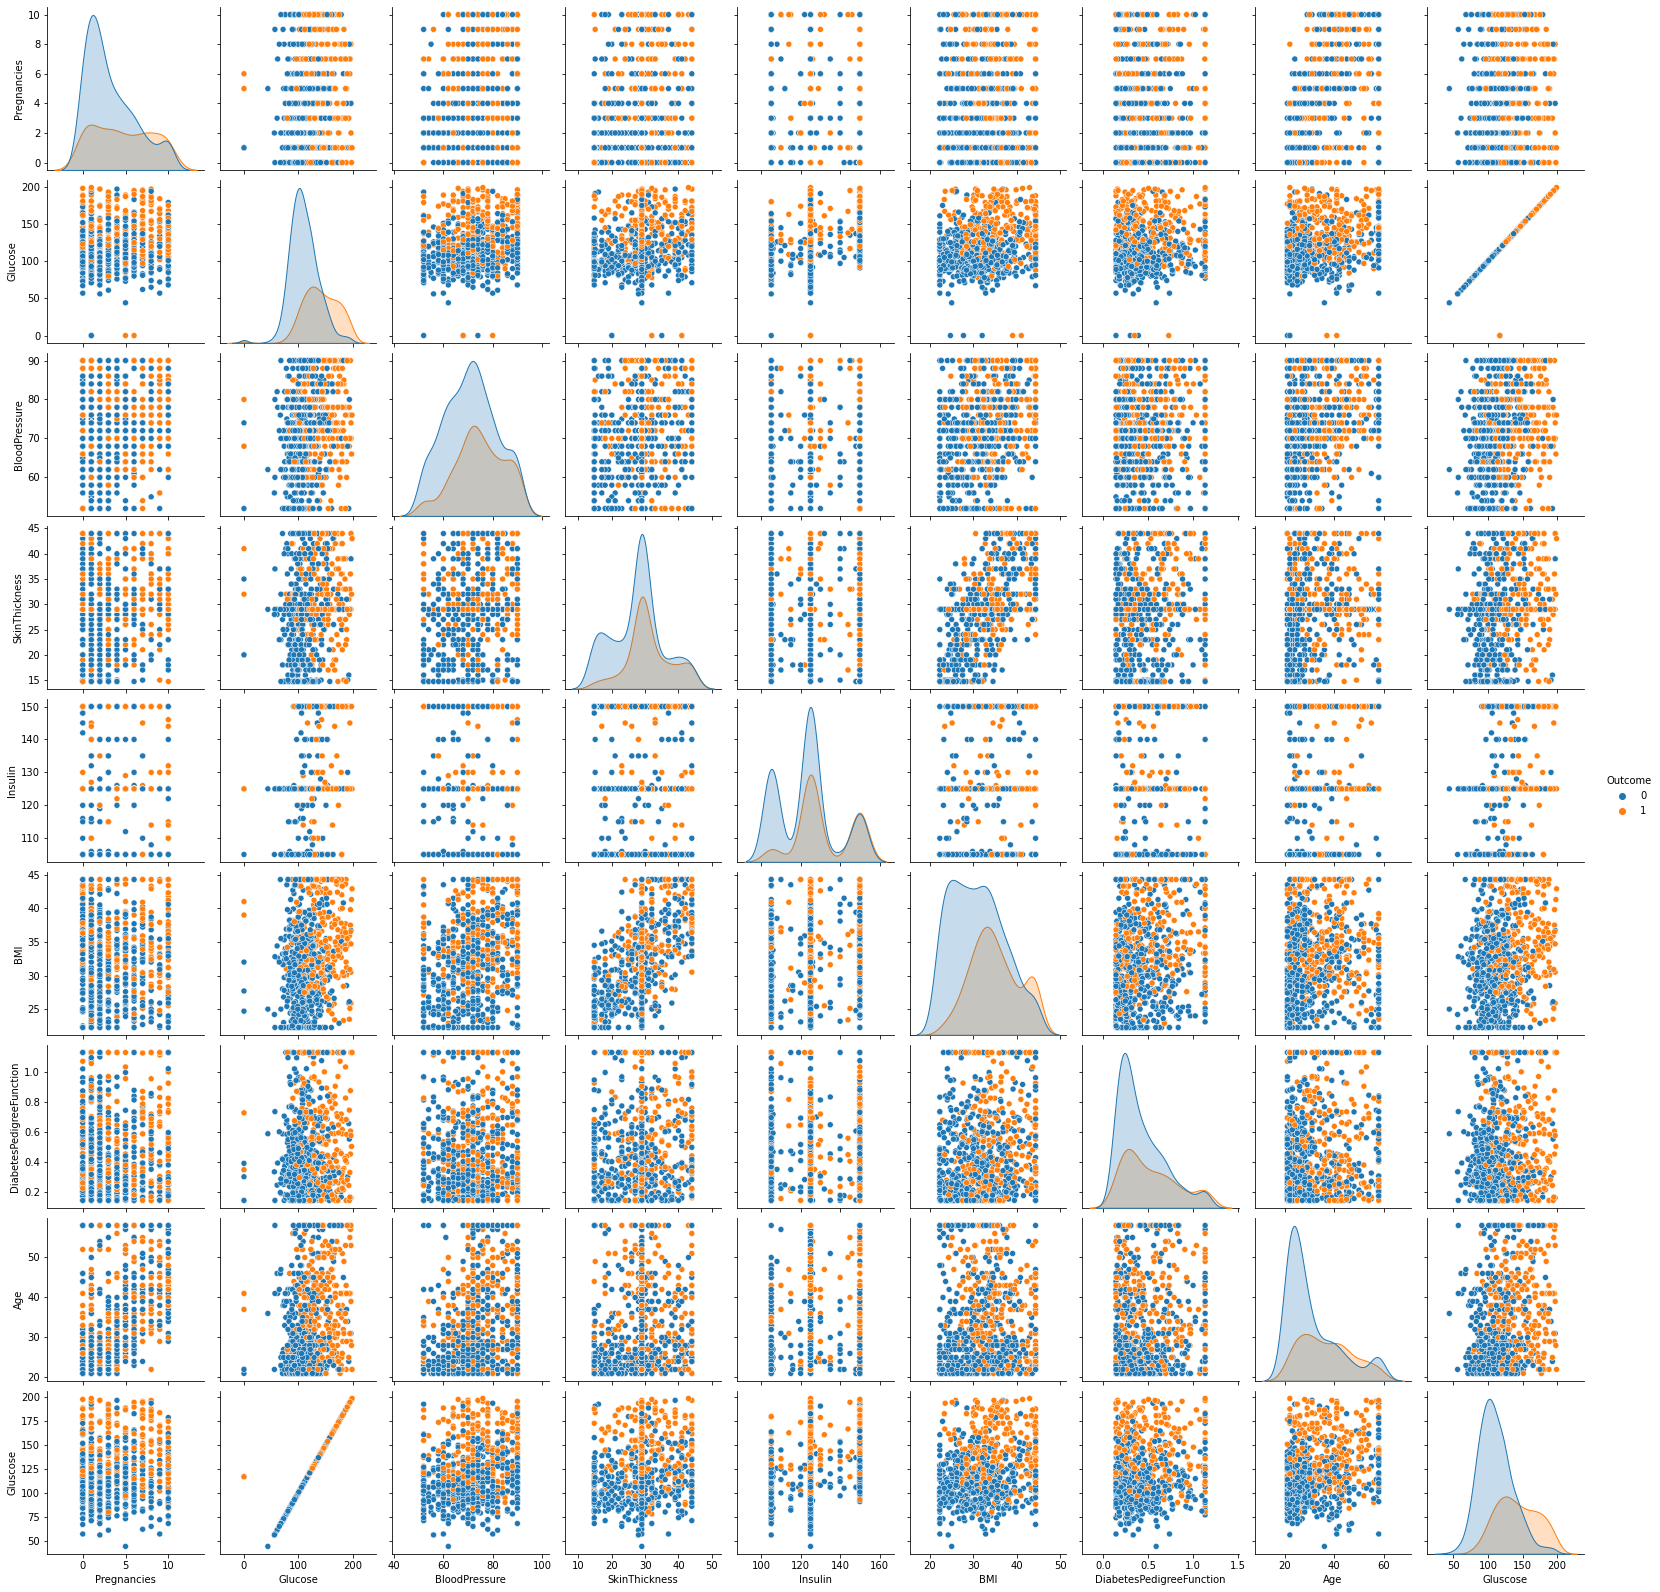

In [135]:
# Pair plot analysis 
sns.pairplot(dataset,hue='Outcome',diag_kind='kde')

In [147]:
dataset = dataset.drop(["Age Group"],axis = 1)

From the above pairplot, we can infer that most of the predictor variables are weak predictors of Outcome. The kernal density plots (diagonal) suggests that the distribution for diabetic and non diabetic are very similar and are overlapping each other significantly, hence they wont be able to differentiate between a diabetic patient and a non diabetic patient.

The scatterplots also suggest very poorly corelated data (data with not hidden patterns or relationships). Hence models built on this data might not be able to identify any hidden patterns or might identify nonsense patterns i.e. patterns that do not make sense.

In [148]:
from sklearn.model_selection import train_test_split
x= dataset.drop(['Outcome'],axis =1)
y=dataset['Outcome']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [149]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [150]:
model.fit(xTrain,yTrain)

GaussianNB()

In [152]:
pred = model.predict(xTest)

In [153]:
pd.DataFrame({"ytest":yTest,"ypred":pred})

,ytest,ypred
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


In [155]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(yTest, pred))

Accuracy: 0.7857142857142857
